<a href="https://colab.research.google.com/github/Juanba98/ExploratoryDataAnalysis/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exploratory Data Analysis**

In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Imports

In [ ]:
# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)

# use sklearn to import a dataset
from sklearn.datasets import load_iris

#1. Importing the working dataset

This data sets consists of 3 different types of irises’ (Setosa, Versicolour and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.



In [ ]:
#load the dataset
iris = load_iris()

#convert the dataset to a pandas dataframe
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
#for a csv
#df = pd.read_csv("path/to/my/file.csv")

#create a column for the target(label)

df["target"] =  iris.target

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#2. Understanding the big picture
Try to understand the problem thinking aboutthe entire dataset and the meaning of the variables. Number of categorical variables. Number of NaN.




*   **Variable**: name of the variable
*   **Type**: the type or format of the variable.
*   **Context**: Understand the semantic space of the variable.
*   **Expectation**: how relevant is this variable with respoect to out task? (*High, Medium, Low*) (**VERY IMPORTANT**)
* **Comments**: Comments to make on the variable (*Optional*)



In [ ]:
df.describe() #provides purely descriptive information about the dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
df.info()#returns us information about the data type, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
df.shape # returns us a pair of numbers that represent the dimensionality of our dataset (rows,columns)

(150, 5)

# 3. Preparation
Start cleaning our dataset in order to continue the analysis
Questions to ask ourself:


*   Are there any useless or redundant variables?
*   Are there any duplicate columns?
*   Does the nomenclature make sense?
*   Are there any new variables we want to create?




In [ ]:
df.duplicated(keep=False).sum() #keep = False to show all the columns that are duplicated

2

In [ ]:
duplicatedRows = df[df.duplicated(keep=False)]
duplicatedRows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
101,5.8,2.7,5.1,1.9,2
142,5.8,2.7,5.1,1.9,2


In [ ]:
#To delete the duplicated rows
duplicatedRow = df[df.duplicated(keep='first')] #keep = first to keep the first intace of this columns so we just delete one of them
duplicatedRow


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
142,5.8,2.7,5.1,1.9,2


In [ ]:
print(f"Before {len(df.index)}")

df = df[~df.duplicated(keep='first')]

print(f"After {len(df.index)}")

Before 150
After 149


##Detect and remove outliers using percentile

In [ ]:
min_threshold, max_threshold = df['sepal length (cm)'].quantile([0.05, 0.95])

print(f'Max Threshold: {max_threshold}')
print(f'Min Threshold: {min_threshold}')
df[(df['sepal length (cm)'] < max_threshold) & (df['sepal length (cm)'] > min_threshold)]

Max Threshold: 7.26
Min Threshold: 4.6


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2
145,6.3,2.5,5.0,1.9,2
146,6.5,3.0,5.2,2.0,2
147,6.2,3.4,5.4,2.3,2


##Reset index

In [ ]:
df = df.reset_index(drop=True) #Do not try to insert index into dataframe columns
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2
145,6.3,2.5,5.0,1.9,2
146,6.5,3.0,5.2,2.0,2
147,6.2,3.4,5.4,2.3,2


To create new features that are the linear / polynomial combination of the existing ones.

#4. Understanding of the variables (Univariate analysis)

## Categorical variables

In [ ]:
df.target.value_counts()#how many values of a given variable there are in our dataset

0    50
1    50
2    49
Name: target, dtype: int64

In [ ]:
df.target.value_counts(normalize = True)#as a percentage

0    0.335570
1    0.335570
2    0.328859
Name: target, dtype: float64

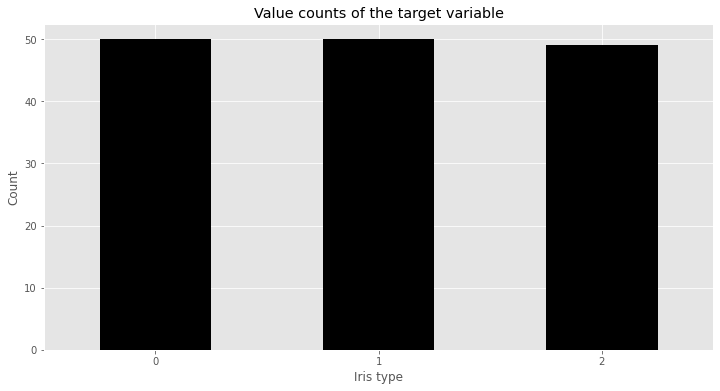

In [ ]:
df.target.value_counts().plot(kind="bar", color=['black'])
plt.title("Value counts of the target variable")
plt.xlabel("Iris type")
plt.xticks(rotation=0) #Rotation of the x label
plt.ylabel("Count")
plt.show()

We can see that we don't have the same number of values for each class so in the modeling phase perhaps we can implement data balancing techniques to not confuse our model.

## Numeric variables

In [ ]:
df['sepal length (cm)'].describe()

count    149.000000
mean       5.843624
std        0.830851
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal length (cm), dtype: float64

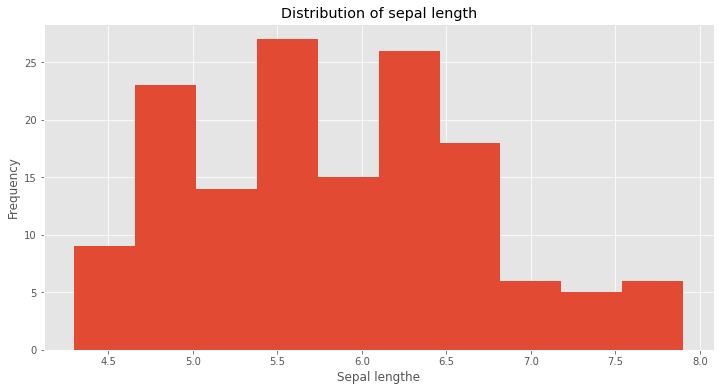

In [ ]:
plt.hist(df['sepal length (cm)'])
plt.title("Distribution of sepal length")
plt.xlabel("Sepal lengthe")
plt.xticks(rotation=0) #Rotation of the x label
plt.ylabel("Frequency")
plt.show()

##Skewness
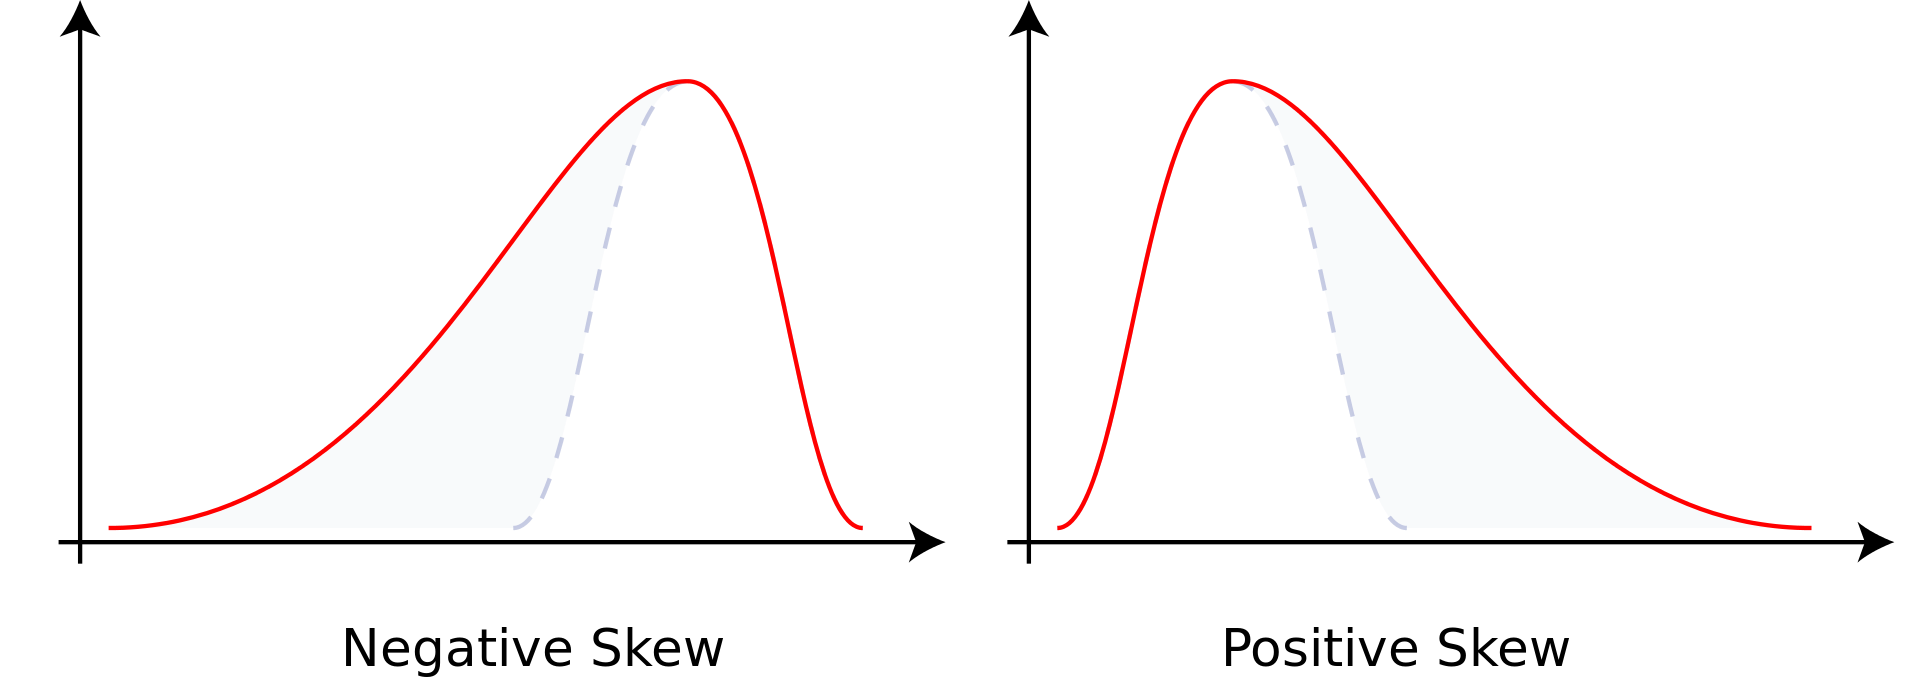

In [ ]:
print(f"Skewness: {df['sepal length (cm)'].skew()}") 

Skewness: 0.31282618518725164


## Kurtosis
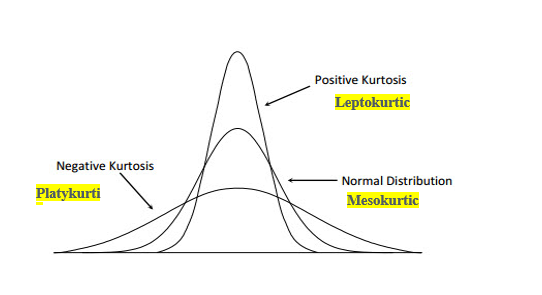

In [ ]:
print(f"Kurtosis: {df['sepal length (cm)'].kurt()}")

Kurtosis: -0.5690064194325988


We must do it for each variable

#4. Study of relationships between variables

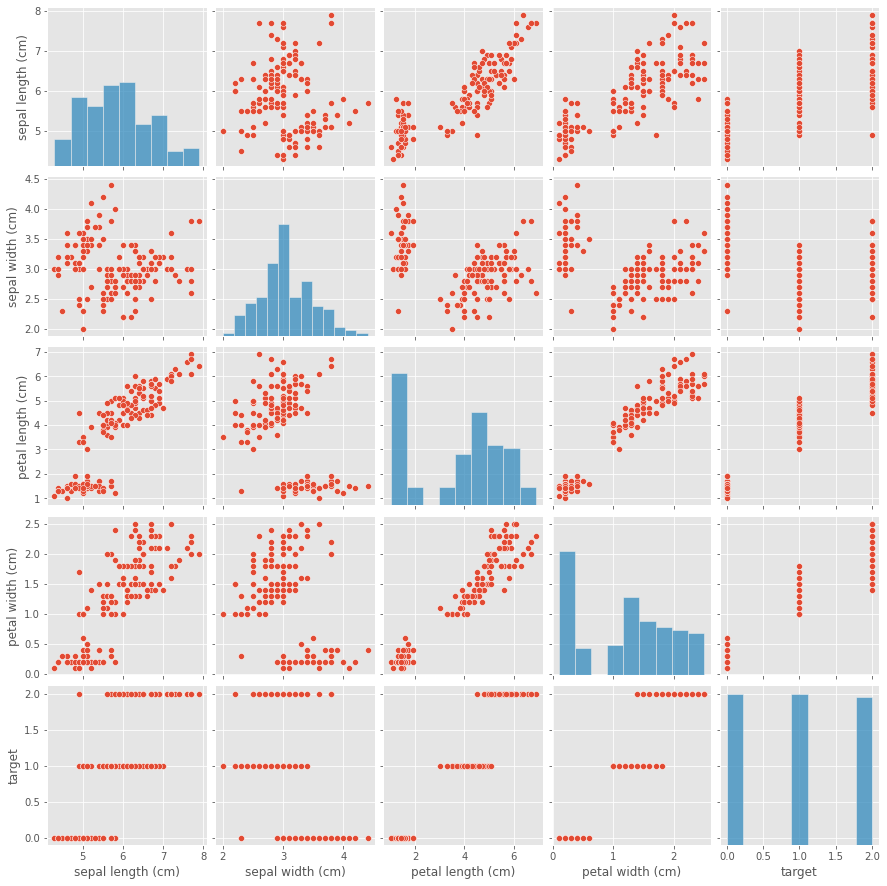

In [ ]:
sns.pairplot(df)

The best way to understand the relationship between a numeric variable and a categorical variable is through a boxplot.
We choose the ones that show slightly more marked segmentations. Like *petal lenght* and *petal width*

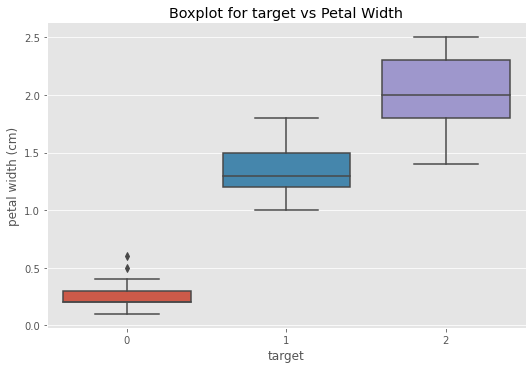

In [ ]:
sns.catplot(x="target", y="petal width (cm)", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for target vs Petal Width")
plt.show()

We can see that the median of the Virginica (target 3) is bigger than the others

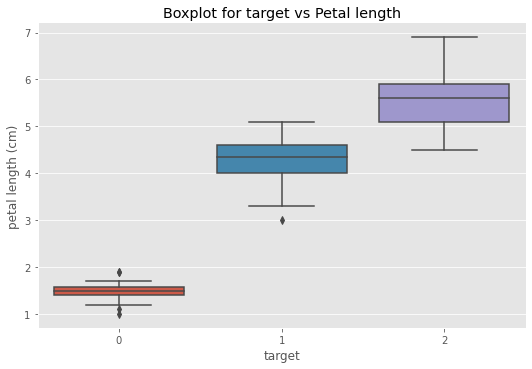

In [ ]:
sns.catplot(x="target", y="petal length (cm)", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for target vs Petal length")
plt.show()

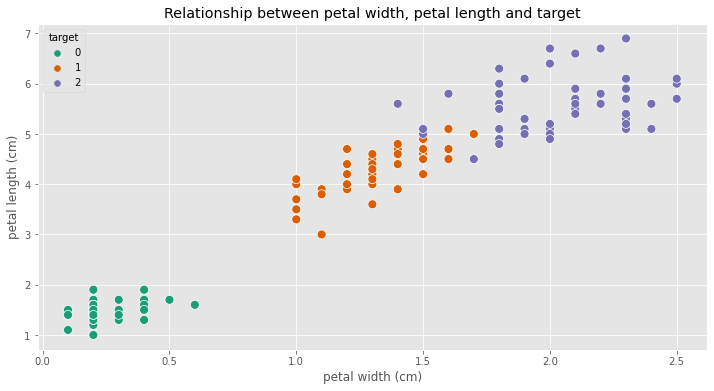

In [ ]:
sns.scatterplot(x="petal width (cm)", y="petal length (cm)", hue="target", data=df, palette="Dark2", s=80)
plt.title("Relationship between petal width, petal length and target")
plt.show()

Now we can see a relation between the length and width of the petals and the type of iris (target)

We are going to create a correlation matrix with Pandas and to isolate the most correlated variables and using sns.heatmap because it allows us to efficiently grasp which variables are strongly correlated with each other.

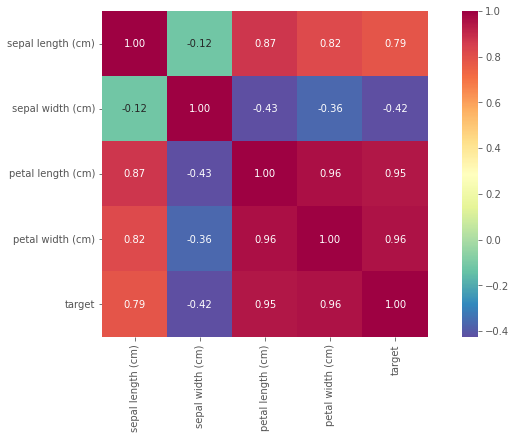

In [ ]:
corrmat = df.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=df.columns, 
                 xticklabels=df.columns, 
                 cmap="Spectral_r")
plt.show()

#5. Brainstorming
*  Create a report for the stakeholders
*  Do modeling
*  Continue with the exploration to further clarify business questions